In [1]:
import pandas as pd
# here we use the DATE column in the data as the index
dataset = pd.read_csv("data/weather.csv", index_col="DATE")

In [2]:
# FEATURE ENGINEERING
# 1. Handling missing data - missing data or null values are bad for modelling

# calculate null value percentage in each column
null_values_per_col = dataset.apply(pd.isnull).sum()
total_datapoints = dataset.shape[0]
null_percent = null_values_per_col / total_datapoints

In [3]:
null_percent

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [4]:
# only use columns where the null percent is less than 5%
valid_columns = dataset.columns[null_percent < 0.05]
dataset = dataset[valid_columns].copy()

In [5]:
dataset

# STATION = Id of the station where the data was collected
# NAME = Station name and city location
# PRCP = Precipitation
# SNOW = Snow
# SNWD = Snow depth
# TMAX = Maximum temperature in Fahrenheit
# TMIN = Minimum temeperature Fahrenheit

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [6]:
# Now the only column which contain null values is the SNWD column
# To deal with this, fill the null values with the last valid value
# Its called forward filling and we can use pandas' DataFrame.ffill() method for that
dataset = dataset.ffill()

In [7]:
dataset.apply(pd.isnull).sum()

STATION    0
NAME       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
dtype: int64

In [8]:
# 2. Assign right datatypes to columns and index
dataset.dtypes
# here all the columns have the right datatype

STATION     object
NAME        object
PRCP       float64
SNOW       float64
SNWD       float64
TMAX         int64
TMIN         int64
dtype: object

In [9]:
dataset.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [10]:
# convert the index datatype to datetime instead from object for ease of processing
dataset.index = pd.to_datetime(dataset.index)

In [11]:
dataset.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [12]:
# 3. Check if there are any gaps in the data
dataset.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: count, dtype: int64

In [13]:
# Since there aren't any gaps, we can leave it as is

In [14]:
dataset.columns.shape[0]

7

<Axes: xlabel='DATE'>

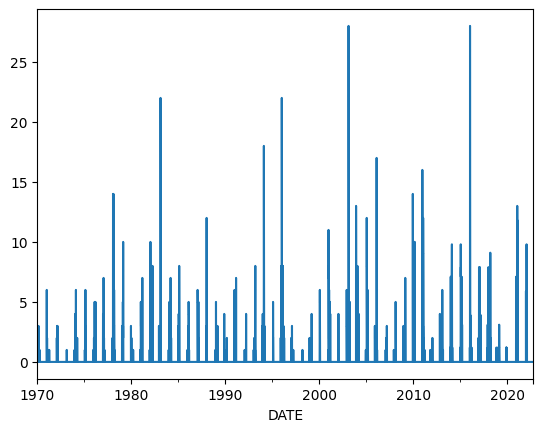

In [15]:
dataset["SNWD"].plot()

In [16]:
# create a target column in the dataset
# we want to predict the maximum temperature for the next day
# so we shift the TMAX column by 1 to get the target values
dataset["target"]  = dataset.shift(-1)["TMAX"]

In [17]:
dataset

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [18]:
# since we shifted the TMAX column by 1, the last row of the dataset will have a null value in the target column
# we can drop that row
dataset = dataset.dropna()

In [19]:
dataset

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,52,67.0
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0


In [20]:
from sklearn.linear_model import Ridge
# here, we are using the Ridge regression model to predict the maximum temperature
# which is a linear regression model that penalizes large coefficients to avoid overfitting to account for multicollinearity
# multicollinearity means that the independent variables are highly correlated with each other

In [21]:
# check collinearity between the features
# dataset.corr()

In [22]:
# from this we can see that TMAX and TMIN are highly correlated
# that means, higher maximum temperature means higher minimum temperature
# here, 1 means perfect correlation and -1 means perfect negative correlation

In [23]:
# ridge = Ridge(alpha=0.5, normalize=True) 
ridge = Ridge(alpha=0.1)
# alpha parameter is the regularization strength
# alpha value controls how much the coefficients are shrunk to account for multicollinearity

In [24]:
features = dataset.drop(columns=["target", "NAME", "STATION"]).columns
# we don't want to use the target column and the NAME and STATION columns as features
# thus, those are removed from the features

In [25]:
features

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [26]:
# here, we are dealing with a time series data which means that the order of the data is important
# so we can't just split the data randomly into training and testing sets
# because that would cause the model to be trained on data from the future and tested on data from the past as well
# so we can use time series cross-validation to split the dataset where the order in terms of time is preserved

# def time_series_cv_alt(dataset, features, target, model):
#     # we use the last 20% of the data as the test set
#     # and the rest as the training set
#     test_size = int(dataset.shape[0] * 0.2)
#     train_size = dataset.shape[0] - test_size
#     train_test_splits = [(list(range(train_size)), list(range(train_size, train_size + test_size)))]
#     # train_test_splits is a list of tuples where each tuple contains the indices of the
#     # training and testing sets
#     # here, we only have one tuple because we only have one split
#     # but we can have more than one split if we want to use more than one split for cross-validation
    
#     for train_indices, test_indices in train_test_splits:
#         X_train = dataset.iloc[train_indices][features]
#         y_train = dataset.iloc[train_indices][target]
#         X_test = dataset.iloc[test_indices][features]
#         y_test = dataset.iloc[test_indices][target]
        
#         model.fit(X_train, y_train)
#         print(model.score(X_test, y_test))
        

def time_series_cv(dataset, features, model, start=3650, step=90):
  all_predictions = []

  for i in range(start, len(dataset), step):
    train = dataset.iloc[:i]
    test = dataset.iloc[i:i+step]

    x_train, y_train = train[features], train["target"]
    x_test, y_test = test[features], test["target"]

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    predictions = pd.Series(predictions, index=test.index)
    combined = pd.concat([y_test, predictions], axis=1) # combine both into one DataFrame with 2 column

    combined.columns = ["actual", "prediction"] # name the columns
    combined["error"] = (combined["prediction"] - combined["actual"]).abs() # new column containing the difference of actual and predicted data
    
    all_predictions.append(combined)

  return pd.concat(all_predictions)


In [27]:
predictions = time_series_cv(dataset, features, ridge)
# predictions_alt = time_series_cv_alt(dataset, features, "target", ridge)
predictions

,actual,prediction,error
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-16,67.0,66.160284,0.839716
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771


In [28]:
# create an error metric by finding the mean of the error between predicted and actual values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

5.1394385413274755

In [29]:
# here, we can see that we were off by around 5 fahrenheit on average
# to improve this, we find the error in a specific time window(or day window) to find the irregularities
def percent_error(old, new):
  return (new - old) / old

def compute_rolling(dataset, day_window, col):
  # day_window is the number of days we want to compute the rolling averages
  # col is the column we want find the rolling average. (here, its TMAX)
  label = f"rolling{day_window}_{col}" # the name of the new column that's going to be created
  dataset[label] = dataset[col].rolling(day_window).mean() # create a new column with rolling average
  dataset[f"{label}_percent"] = percent_error(dataset[label], dataset[col])
  return dataset

rolling_day_window = [3, 14]

for day_window in rolling_day_window:
  for col in ["TMAX", "TMIN", "PRCP"]:
    dataset = compute_rolling(dataset, day_window, col)


/tmp/ipykernel_747/1383972031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[label] = dataset[col].rolling(day_window).mean() # create a new column with rolling average
/tmp/ipykernel_747/1383972031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f"{label}_percent"] = percent_error(dataset[label], dataset[col])
/tmp/ipykernel_747/1383972031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [30]:
dataset

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling3_TMAX,rolling3_TMAX_percent,rolling3_TMIN,rolling3_TMIN_percent,rolling3_PRCP,rolling3_PRCP_percent,rolling14_TMAX,rolling14_TMAX_percent,rolling14_TMIN,rolling14_TMIN_percent,rolling14_PRCP,rolling14_PRCP_percent
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,52,67.0,67.666667,-0.024631,50.000000,0.040000,0.036667,-1.0,66.071429,-0.001081,50.428571,0.031161,0.283571,-1.000000
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,51.000000,0.058824,0.026667,2.0,67.142857,-0.002128,50.785714,0.063291,0.233571,-0.657492
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,51.333333,-0.064935,0.026667,-1.0,67.285714,-0.138004,50.857143,-0.056180,0.135000,-1.000000
